In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
heart=pd.read_csv('heart.csv')

In [4]:
info = ["age","0: female, 1: males","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-4) colored by flouroscopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect","target: based on all the features whether the person has heart disease or not, 0 labels No and 1 labels Yes"]

In [5]:
info

['age',
 '0: female, 1: males',
 'chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic',
 'resting blood pressure',
 ' serum cholestoral in mg/dl',
 'fasting blood sugar > 120 mg/dl',
 'resting electrocardiographic results (values 0,1,2)',
 ' maximum heart rate achieved',
 'exercise induced angina',
 'oldpeak = ST depression induced by exercise relative to rest',
 'the slope of the peak exercise ST segment',
 'number of major vessels (0-4) colored by flouroscopy',
 'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect',
 'target: based on all the features whether the person has heart disease or not, 0 labels No and 1 labels Yes']

In [6]:
heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [7]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
heart.groupby('target').sum()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
target                                                                  
0       7811  114   66     18547  34650   22       62    19196     76   
1       8662   93  227     21335  39968   23       98    26147     23   

        oldpeak  slope   ca  thal  
target                             
0         218.8    161  161   351  
1          96.2    263   60   350

In [9]:
heart.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

In [10]:
heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
heart['target'].unique()

array([1, 0], dtype=int64)

The graph below shows the number of people (on y axis) with all the features (on x axis), the maxm length hist represents the value closer to the mean. 

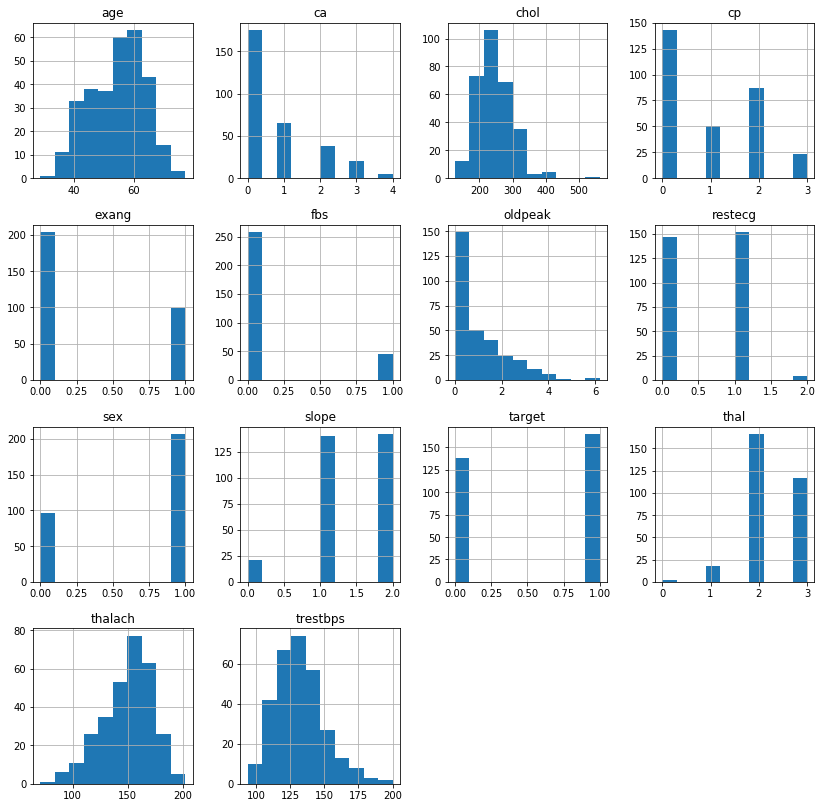

In [13]:
heart.hist(figsize=(14,14))
plt.show()

C:\Users\Manan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



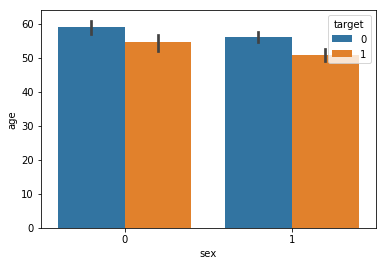

In [14]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

From above graph we conclude that the chances of male getting heart disease at the age of 55 is more and for females chances of getting heart disease is more at the age of 52 (this observation is solely based on the data colloected, it has nothing to do with the actual facts and figures)

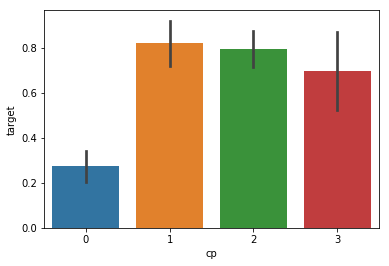

In [15]:
sns.barplot(heart['cp'],heart['target'])

<b> From above graph Chances of having heart disease with atypical angina is more </b>

<b> The graph below represents no. of males(1) and females(0) have heart disease, based on this grpah, no. of males with heart disease are more than females </b>`

In [16]:
px.bar(heart,heart['sex'],heart['target'])

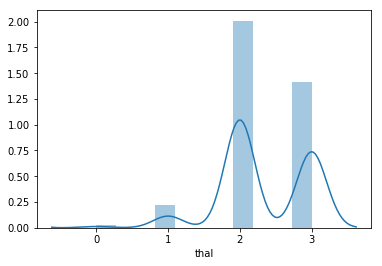

In [17]:
sns.distplot(heart['thal'])

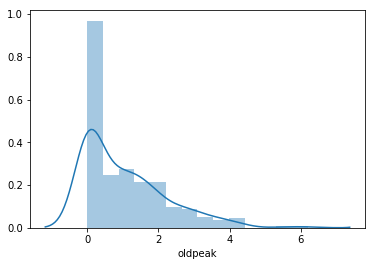

In [18]:
sns.distplot(heart['oldpeak'])

<hr> 
<h4> A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below. <h4>
<hr>    

C:\Users\Manan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Manan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



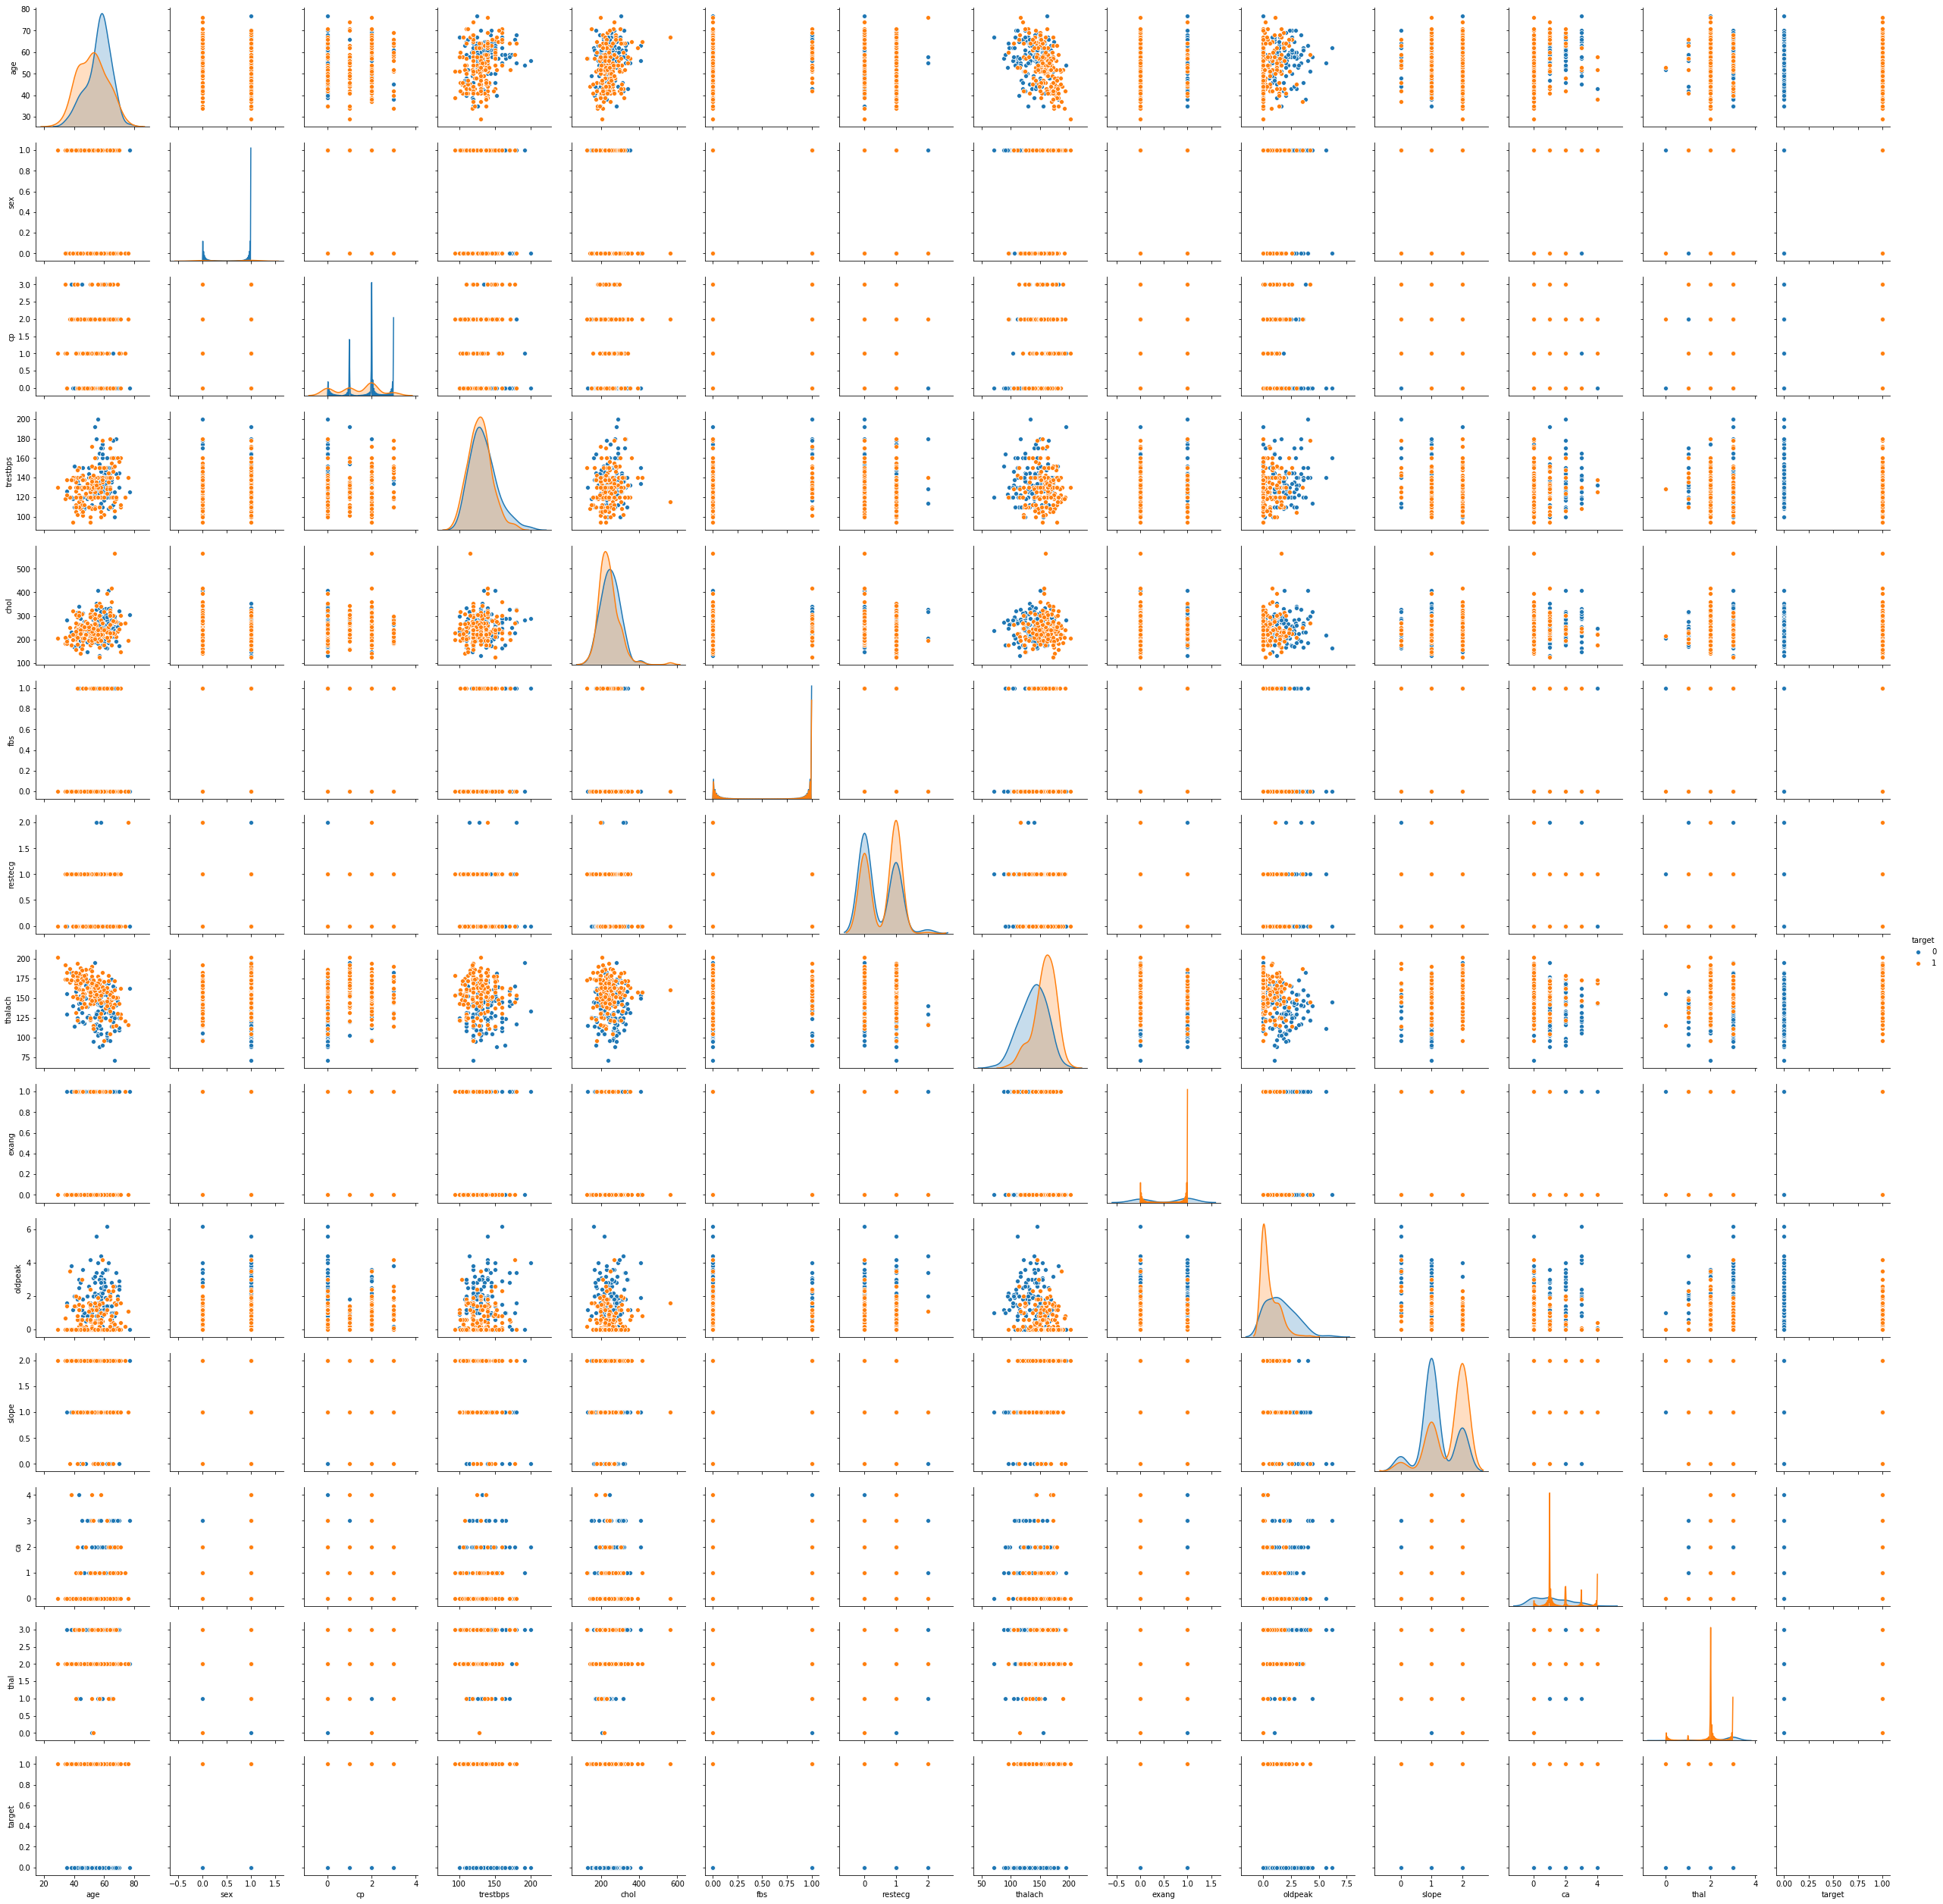

In [19]:
sns.pairplot(heart,hue='target')

In [20]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak'] #with lesser features for better visualisation

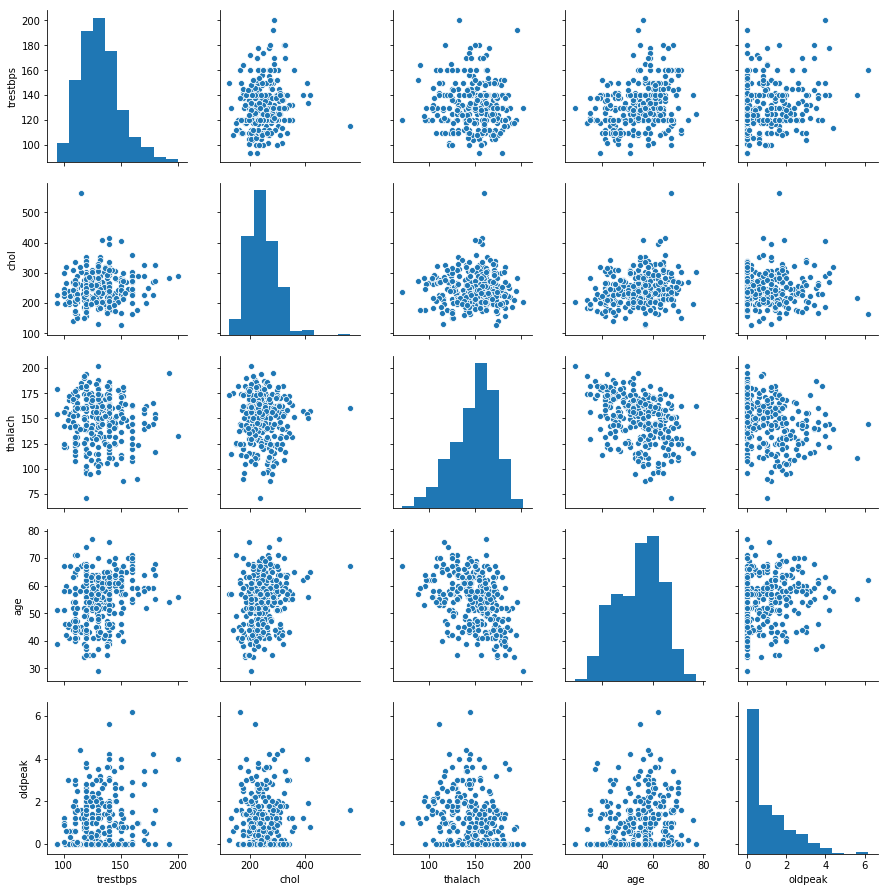

In [21]:
sns.pairplot(heart[numeric_columns])

1    165
0    138
Name: target, dtype: int64


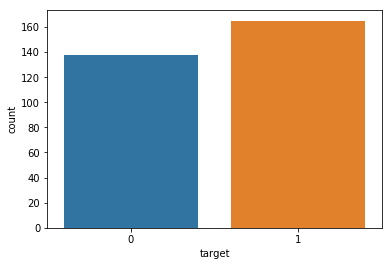

In [22]:
y=heart['target']
sns.countplot(y)
target_temp=heart.target.value_counts()
print(target_temp)

The above just represents the no. of people with heart diease and no. of people without heart disease based on the given heart data set

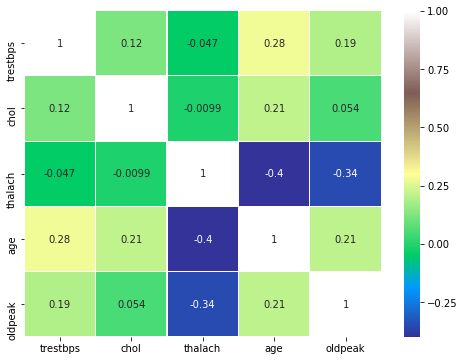

In [23]:
sns.heatmap(heart[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<b> Pearson's Correlation Coefficient is a linear correlation coefficient that returns a value between -1 and +1. A -1 means there is a strong negative correlation and +1 means that there is a strong positive correlation. A 0 means that there is no correlation, in the above figure, the heat map represents the correlation between a certain set of features with each other and in the figure below correlation with all set of features in the dataset are shown</b>

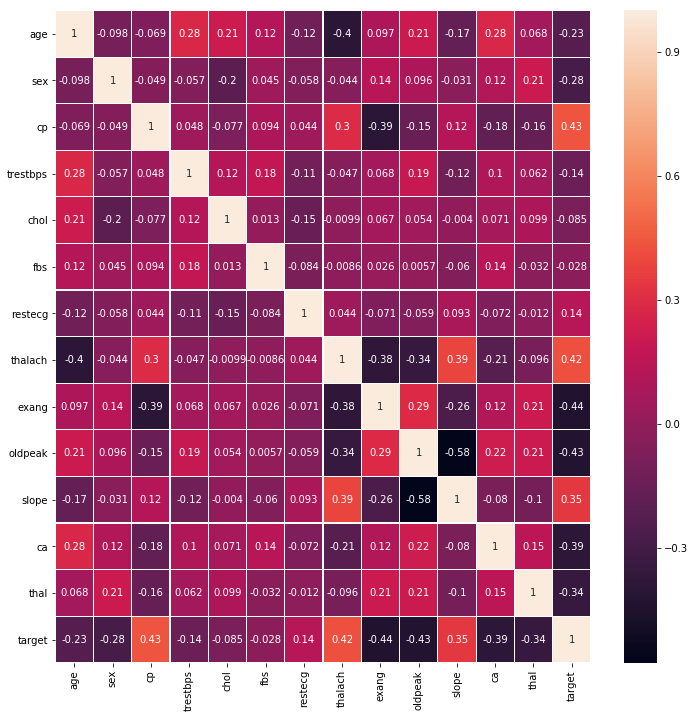

In [24]:
sns.heatmap(heart.corr(),annot=True,linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

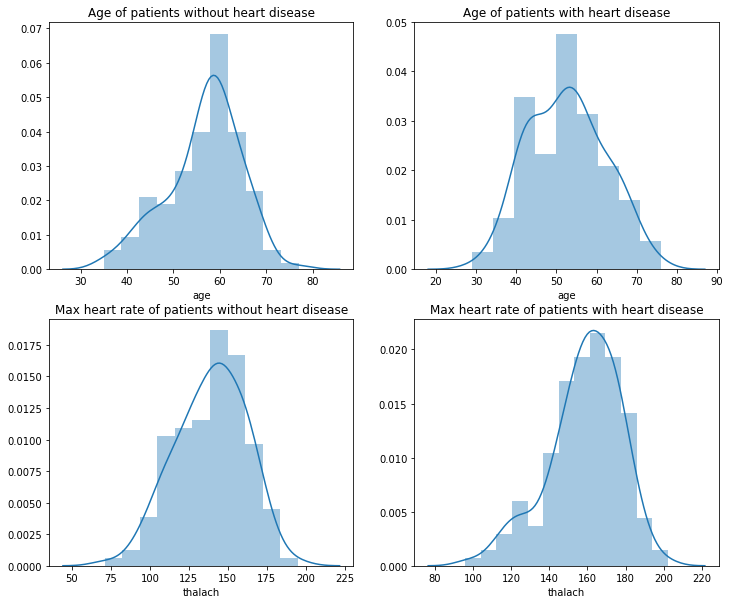

In [25]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')

plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()

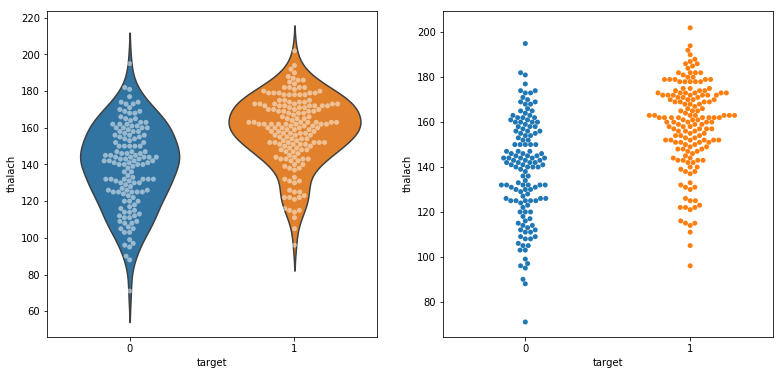

In [26]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x='target',y='thalach',data=heart,inner=None)
sns.swarmplot(x='target',y='thalach',data=heart,color='w',alpha=0.5)

plt.subplot(122)
# row,col,position
sns.swarmplot(x='target',y='thalach',data=heart)
plt.show()

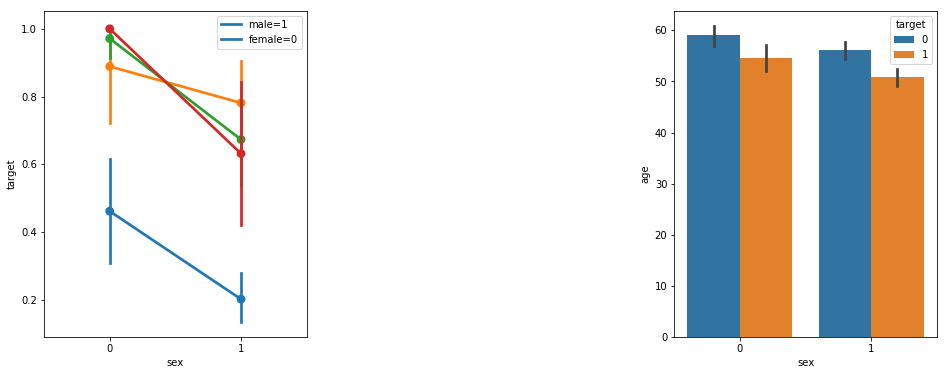

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x='sex',y='target',hue='cp',data=heart)
plt.legend(['male=1','female=0'])

plt.subplot(133)
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])
plt.show()

# Training the Model

In [28]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [29]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [30]:
heart['target'].sum()

165

In [31]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [32]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

Breaking the dataset

In [34]:
X,y=heart.loc[:,:'thal'],heart.loc[:,'target']
print(f"\t Data in X is \n {X} ,\n Data in y is \n {y}")

	 Data in X is 
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2

In [35]:
print(X.shape,y.shape)

(303, 13) (303,)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [38]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
49    53    0   0       138   234    0        0      160      0      0.0   
171   48    1   1       110   229    0        1      168      0      1.0   
223   56    0   0       200   288    1        0      133      1      4.0   
58    34    1   3       118   182    0        0      174      0      0.0   
154   39    0   2       138   220    0        1      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
156   47    1   2       130   253    0        1      179      0      0.0   
123   54    0   2       108   267    0        0      167      0      0.0   
15    50    0   2       120   219    0        1      158      0      1.6   
125   34    0   1       118   210    0        1      192      0      0.7   
265   66    1   0       112   212    0        0      132      1      0.1   

     slope  ca  thal  
49       2   0     2  
171      0   0     3  
223      0   2     3  
58       2   0     2  
154      1   0     2  
..     ...  ..   ...  
156      2   0     2  
123      2   0     2  
15       1   0     2  
125      2   0     2  
265      2   1     2  

[212 rows x 13 columns]

In [39]:
print("train_set_x shape:" + str(X_train.shape))
print("train_set_y shape:" + str(y_train.shape))
print("test_set_x shape:" + str(X_test.shape))
print("test_set_y shape:" + str(y_test.shape))


train_set_x shape:(212, 13)
train_set_y shape:(212,)
test_set_x shape:(91, 13)
test_set_y shape:(91,)


# Model
# Decision Tree Classifier

In [40]:
Category=['No...and i pray you dont get any Heart Disease or Virus','Yes... unfortuneatly you have Heart Disease']

In [41]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
prediction=df.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [43]:
accuracy_dt

74.72527472527473

In [44]:
print('Accuracy on training set: {:.3f}'.format(df.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(df.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [45]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [46]:
prediction

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [47]:
print(Category[int(prediction[0])])
print(Category[int(prediction[1])])

No...and i pray you dont get any Heart Disease or Virus
Yes... unfortuneatly you have Heart Disease


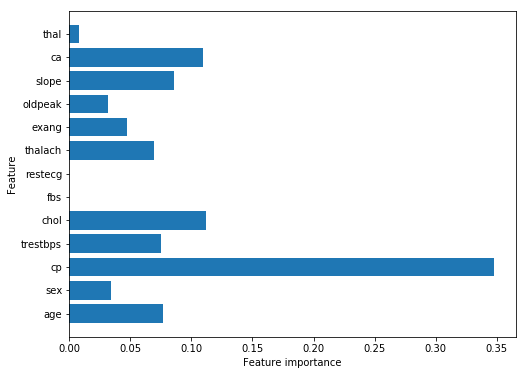

In [48]:
def plot_feature(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
plot_feature(df)
plt.savefig('heart_disease_fig')

The above graph shows that out of all features chest pain is the most deterministic factor which can tell whether the person suffers from heart disease or not.

# KNN Model

In [49]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Manan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Manan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [50]:
print(X_train_std,X_test_std)  #Normal dist Z values

[[-0.14519743 -1.35154233 -0.97043553 ...  0.98136289 -0.67157686
  -0.41927286]
 [-0.68904647  0.73989544  0.00459922 ... -2.1949567  -0.67157686
   1.22676132]
 [ 0.18111199 -1.35154233 -0.97043553 ... -2.1949567   1.33369489
   1.22676132]
 ...
 [-0.47150685 -1.35154233  0.97963397 ... -0.6067969  -0.67157686
  -0.41927286]
 [-2.21182377 -1.35154233  0.00459922 ...  0.98136289 -0.67157686
  -0.41927286]
 [ 1.26881006  0.73989544 -0.97043553 ...  0.98136289  0.33105902
  -0.41927286]] [[ 0.18111199 -1.35154233 -0.97043553 ... -0.6067969   1.33369489
   1.22676132]
 [ 0.39865161  0.73989544  0.97963397 ... -0.6067969   0.33105902
   1.22676132]
 [ 1.05127045  0.73989544  0.97963397 ... -0.6067969  -0.67157686
   1.22676132]
 ...
 [ 0.2898818   0.73989544  0.97963397 ... -0.6067969   0.33105902
   1.22676132]
 [-0.25396724  0.73989544  0.00459922 ...  0.98136289 -0.67157686
  -0.41927286]
 [ 0.61619122  0.73989544 -0.97043553 ... -0.6067969   1.33369489
   1.22676132]]


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std,y_train) #performs steps 1-4 as mentioned in pdf attached with this notebook

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [52]:
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [53]:
accuracy_knn

84.61538461538461

In [54]:
print('Accuracy on training set: {:.3f}'.format(knn.score(X_train_std,y_train)))
print('Accuracy on test set: {:.3f}'.format(knn.score(X_test_std,y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.846


In [55]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

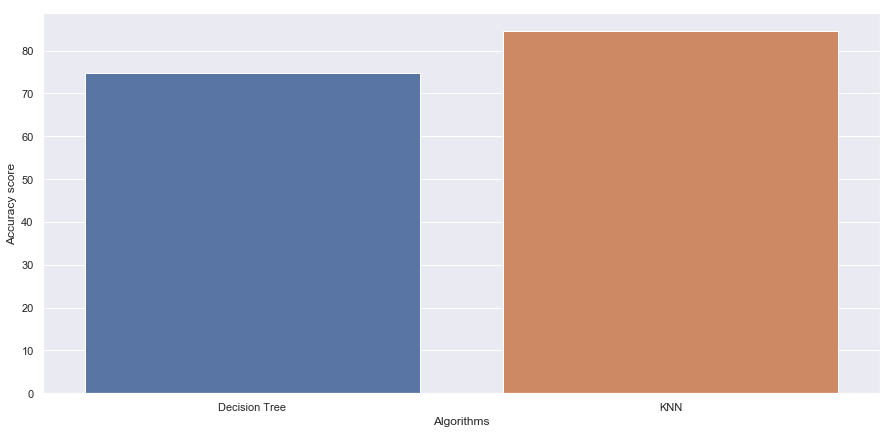

In [56]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

KNN performs better on this dataset than decision tree classifier